# End-to-End Data Science Project: Clustering the Iris Dataset

## Project Objective
The goal is to cluster iris flowers based on their sepal and petal measurements using the Iris dataset. We'll identify distinct groups (clusters) of flowers and validate their separability.

## Step 1: Problem Definition
**Objective**: 
Cluster the flowers into groups using an unsupervised learning algorithm (K-Means) and evaluate the cluster performance using techniques such as the elbow method and silhouette scores.

## Step 2: Data Collection
The Iris dataset is available in the sklearn.datasets module. It contains:

4 features: Sepal length, Sepal width, Petal length, Petal width
150 observations (50 samples for each of the three species).

## Step 3: Import Libraries and Load the Dataset

In [1]:
# Import necessary libraries
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

# Load the Iris dataset
iris = load_iris()
df = pd.DataFrame(data=iris.data, columns=iris.feature_names)
df['species'] = iris.target

## Step 4: Exploratory Data Analysis (EDA)
### 4.1 Inspect the Data

In [2]:
# Quick overview
df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),species
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   sepal length (cm)  150 non-null    float64
 1   sepal width (cm)   150 non-null    float64
 2   petal length (cm)  150 non-null    float64
 3   petal width (cm)   150 non-null    float64
 4   species            150 non-null    int32  
dtypes: float64(4), int32(1)
memory usage: 5.4 KB


In [4]:
df.describe()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),species
count,150.000000,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.057333,3.758000,1.199333,1.000000
std,0.828066,0.435866,1.765298,0.762238,0.819232
min,4.300000,2.000000,1.000000,0.100000,0.000000
25%,5.100000,2.800000,1.600000,0.300000,0.000000
50%,5.800000,3.000000,4.350000,1.300000,1.000000
75%,6.400000,3.300000,5.100000,1.800000,2.000000
max,7.900000,4.400000,6.900000,2.500000,2.000000


In [5]:
df.isna().sum()

sepal length (cm)    0
sepal width (cm)     0
petal length (cm)    0
petal width (cm)     0
species              0
dtype: int64

In [6]:
df.duplicated().sum()

1

We can see that there is a single Duplicate value which we need to deal with.

### Checking for Outliers

In [15]:
from scipy.stats import zscore

# Automatically select numeric columns
numeric_cols = df.select_dtypes(include=['number']).columns

# Calculate Z-scores for all numeric columns
z_scores = df[numeric_cols].apply(zscore)

# Identify outliers in each column
outliers = (z_scores.abs() > 3).sum()

# Print the number of outliers per column
print("Outliers per column:")
print(outliers)

Outliers per column:
sepal length (cm)    0
sepal width (cm)     1
petal length (cm)    0
petal width (cm)     0
species              0
dtype: int64


In [8]:
# Automatically select numeric columns
numeric_cols = df.select_dtypes(include=['number']).columns

# Initialize a dictionary to store the outlier counts
outlier_counts = {}

# Loop through each numeric column
for col in numeric_cols:
    # Calculate Q1 (25th percentile) and Q3 (75th percentile)
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    
    # Calculate the Interquartile Range (IQR)
    IQR = Q3 - Q1
    
    # Define lower and upper bounds for outliers
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    
    # Identify outliers
    outliers = df[(df[col] < lower_bound) | (df[col] > upper_bound)]
    
    # Store the count of outliers for the column
    outlier_counts[col] = outliers.shape[0]

# Print the number of outliers per column
print("Outliers per column (IQR Method):")
for col, count in outlier_counts.items():
    print(f"{col}: {count}")

Outliers per column (IQR Method):
sepal length (cm): 0
sepal width (cm): 4
petal length (cm): 0
petal width (cm): 0
species: 0


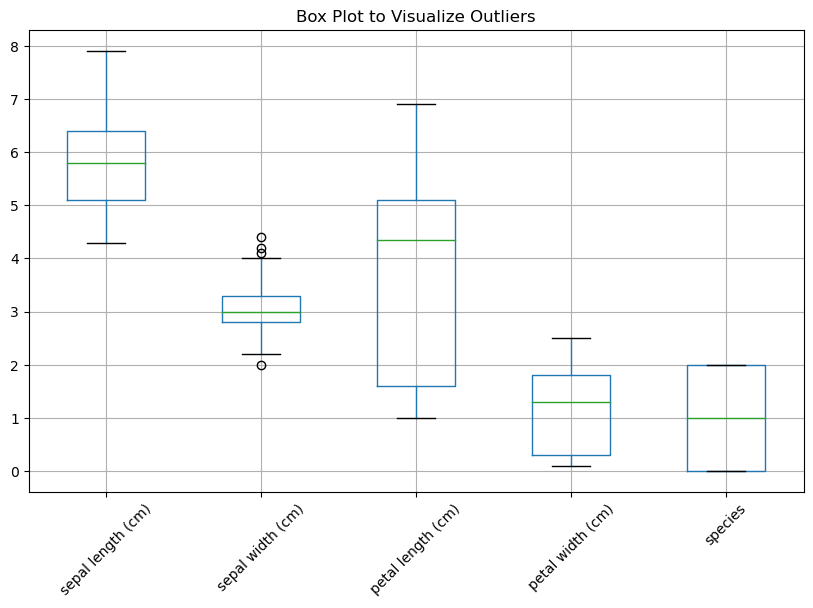

In [16]:
import matplotlib.pyplot as plt

# Box plot for each numeric column
df[numeric_cols].boxplot(figsize=(10, 6))
plt.title("Box Plot to Visualize Outliers")
plt.xticks(rotation=45)
plt.show()


From the above check for outliers we can see that there are atleast 4 outliers in the `sepal width (cm)` feature.

### 4.2 Visualize Pairwise Relationships

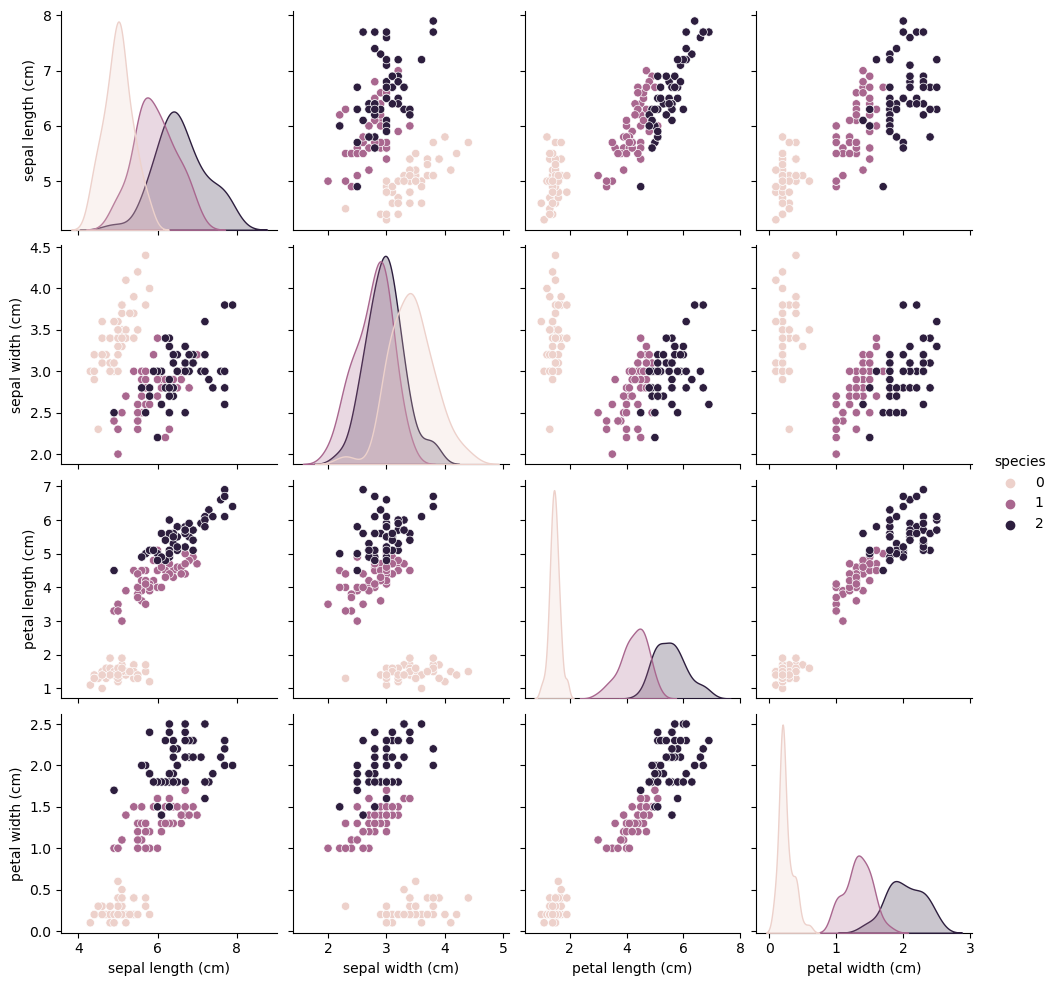

In [17]:
sns.pairplot(df, hue='species', diag_kind='kde')
plt.show()

### 4.3 Correlation Analysis

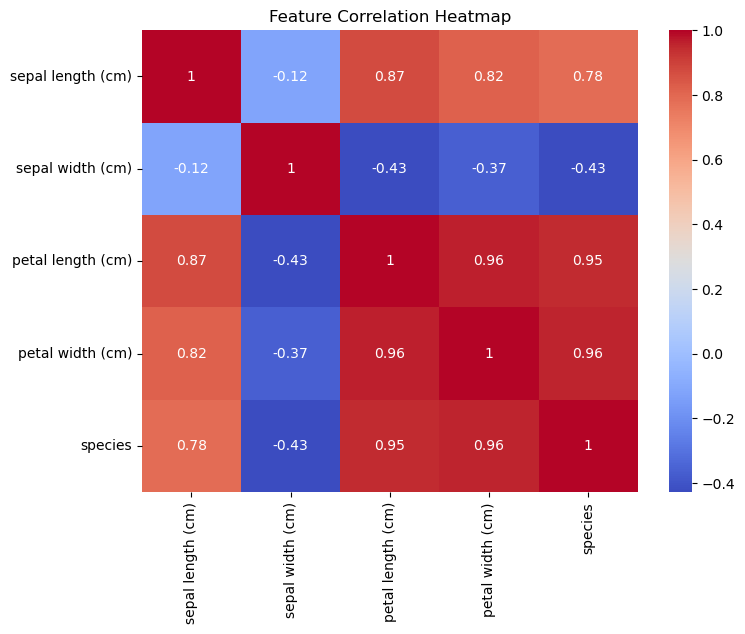

In [18]:
plt.figure(figsize=(8, 6))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm')
plt.title("Feature Correlation Heatmap")
plt.show()